In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iquitos_cases = pd.read_csv("../dengueData/Iquitos/iquitos_testing_data.csv")
iquitos_cases
dictionary = {}
startDate = None
for index, row in iquitos_cases.iterrows():
    if(startDate is None):
        startDate = pd.to_datetime(row["week_start_date"])
    dictionary[pd.to_datetime(row["week_start_date"])] = []

In [3]:
iquitos_precipitation = pd.read_excel("../environmentalData/Iquitos/Iquitos_Precip.xlsx", skiprows=1)
for index, row in iquitos_precipitation.iterrows():
    dateStr = "{}/{}/{}".format(int(row[" Day"]), int(row[" Month"]), int(row["Year"]))
    date = pd.to_datetime(dateStr)
    if(date >= startDate):
        while(date not in dictionary):
            date -= pd.to_timedelta(1, "D")
        if(row[" mm"] >= 0):
            dictionary[date].append(row[" mm"])
            

In [4]:
print(dictionary)

{Timestamp('2000-07-01 00:00:00'): [9.3, 1.68, 16.41, 0.0, 8.19, 0.99, 0.74], Timestamp('2000-07-08 00:00:00'): [3.4, 0.0, 6.8, 0.73, 0.37, 10.38, 58.35], Timestamp('2000-07-15 00:00:00'): [0.0, 0.0, 0.0, 0.0, 0.0, 25.89, 11.26], Timestamp('2000-07-22 00:00:00'): [0.0, 0.0, 25.61, 3.84, 0.0, 0.0, 1.48], Timestamp('2000-07-29 00:00:00'): [11.6, 2.47, 5.62, 2.17, 7.72, 1.43, 1.77], Timestamp('2000-08-05 00:00:00'): [0.0, 15.37, 1.02, 5.54, 0.0, 5.84, 16.86], Timestamp('2000-08-12 00:00:00'): [0.0, 1.08, 0.0, 0.7, 10.24, 12.77, 5.97], Timestamp('2000-08-19 00:00:00'): [10.91, 12.67, 1.93, 2.3, 1.34, 3.53, 14.72], Timestamp('2000-08-26 00:00:00'): [0.74, 6.79, 4.63, 20.34, 0.0, 0.0, 0.0], Timestamp('2000-09-02 00:00:00'): [0.0, 8.21, 33.19, 44.77, 3.53, 0.84, 28.33], Timestamp('2000-09-09 00:00:00'): [19.39, 30.49, 13.38, 13.23, 3.77, 2.19, 6.77], Timestamp('2000-09-16 00:00:00'): [21.25, 11.97, 0.0, 0.51, 8.94, 4.4, 2.76], Timestamp('2000-09-23 00:00:00'): [50.33, 1.97, 26.98, 15.93, 0.58

In [5]:
dateDictionary = {}
for key in dictionary:
    dateDictionary[key.strftime('%Y-%m-%d')] = np.average(dictionary[key])
    
print(dateDictionary)

{'2000-07-01': 5.33, '2000-07-08': 11.432857142857143, '2000-07-15': 5.307142857142857, '2000-07-22': 4.418571428571428, '2000-07-29': 4.682857142857143, '2000-08-05': 6.3757142857142854, '2000-08-12': 4.394285714285714, '2000-08-19': 6.771428571428571, '2000-08-26': 4.642857142857143, '2000-09-02': 16.981428571428573, '2000-09-09': 12.745714285714284, '2000-09-16': 7.118571428571427, '2000-09-23': 15.715714285714286, '2000-09-30': 5.948571428571428, '2000-10-07': 3.7885714285714287, '2000-10-14': 9.552857142857144, '2000-10-21': 7.315714285714286, '2000-10-28': 4.935714285714285, '2000-11-04': 8.92142857142857, '2000-11-11': 9.692857142857145, '2000-11-18': 2.5385714285714287, '2000-11-25': 3.4842857142857144, '2000-12-02': 5.112857142857142, '2000-12-09': 3.101428571428572, '2000-12-16': 1.3800000000000001, '2000-12-23': 15.618888888888891, '2001-01-01': 15.617142857142856, '2001-01-08': 6.922857142857144, '2001-01-15': 9.578571428571427, '2001-01-22': 12.791428571428572, '2001-01-29

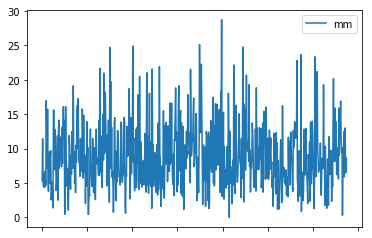

In [6]:
precipitation_df = pd.DataFrame(dateDictionary, index=[0]).transpose()
precipitation_df.columns = ["mm"]
precipitation_df.plot()
plt.show()

precipitation_df.to_csv("Iquitos_precipitation_weekly.csv")

In [7]:
precipitation_df.head()

,mm
2000-07-01,5.330000
2000-07-08,11.432857
2000-07-15,5.307143
2000-07-22,4.418571
2000-07-29,4.682857


In [8]:
iquitos_cases.head()

,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,total_cases
0,2000/2001,1,2000-07-01,0,0,0,0,0,0
1,2000/2001,2,2000-07-08,0,0,0,0,0,0
2,2000/2001,3,2000-07-15,0,0,0,0,0,0
3,2000/2001,4,2000-07-22,0,0,0,0,0,0
4,2000/2001,5,2000-07-29,0,0,0,0,0,0


In [9]:
print(np.correlate(iquitos_cases["total_cases"][:-208], precipitation_df["mm"][:-208]))

[35349.41154762]


In [10]:
sanjuan_cases = pd.read_csv("../dengueData/SanJuan/san_juan_testing_data.csv")
sanjuan_cases
dictionary = {}
startDate = None
for index, row in sanjuan_cases.iterrows():
    if(startDate is None):
        startDate = pd.to_datetime(row["week_start_date"])
    dictionary[pd.to_datetime(row["week_start_date"])] = []

In [11]:
sanjuan_cases

,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,additional_cases,total_cases
0,1990/1991,1,1990-04-30,0,0,0,0,4,0,4
1,1990/1991,2,1990-05-07,0,0,0,0,5,0,5
2,1990/1991,3,1990-05-14,0,0,0,0,4,0,4
3,1990/1991,4,1990-05-21,0,0,0,0,3,0,3
4,1990/1991,5,1990-05-28,0,0,0,0,6,0,6
5,1990/1991,6,1990-06-04,1,0,0,0,1,0,2
6,1990/1991,7,1990-06-11,0,0,0,0,4,0,4
7,1990/1991,8,1990-06-18,0,0,0,0,5,0,5
8,1990/1991,9,1990-06-25,2,0,0,0,8,0,10
9,1990/1991,10,1990-07-02,0,0,0,1,5,0,6


In [26]:
sanjuan_precipitation = pd.read_excel("../environmentalData/SanJuan/SanJuan_Precip.xlsx", skiprows=1)
for index, row in iquitos_precipitation.iterrows():
    dateStr = "{}/{}/{}".format(int(row[" Day"]), int(row[" Month"]), int(row["Year"]))
    date = pd.to_datetime(dateStr)
    if(date >= startDate):
        while(date not in dictionary):
            date -= pd.to_timedelta(1, "D")
        if(row[" mm"] >= 0):
            dictionary[date].append(row[" mm"])

In [27]:
print(dictionary)

{Timestamp('1990-04-30 00:00:00'): [2.55, 1.99, 0.0, 34.99, 5.73, 2.55, 1.99, 0.0, 34.99, 5.73], Timestamp('1990-05-07 00:00:00'): [12.76, 1.22, 3.19, 3.03, 0.48, 7.58, 9.6, 12.76, 1.22, 3.19, 3.03, 0.48, 7.58, 9.6], Timestamp('1990-05-14 00:00:00'): [0.57, 0.0, 4.11, 2.64, 1.69, 0.0, 0.0, 0.57, 0.0, 4.11, 2.64, 1.69, 0.0, 0.0], Timestamp('1990-05-21 00:00:00'): [0.0, 0.0, 0.0, 0.0, 0.0, 2.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.08, 0.0], Timestamp('1990-05-28 00:00:00'): [4.25, 17.62, 0.0, 1.27, 20.98, 3.53, 1.08, 4.25, 17.62, 0.0, 1.27, 20.98, 3.53, 1.08], Timestamp('1990-06-04 00:00:00'): [25.15, 5.17, 38.49, 1.07, 0.0, 0.0, 1.32, 25.15, 5.17, 38.49, 1.07, 0.0, 0.0, 1.32], Timestamp('1990-06-11 00:00:00'): [0.0, 0.0, 41.45, 0.0, 4.07, 13.88, 33.09, 0.0, 0.0, 41.45, 0.0, 4.07, 13.88, 33.09], Timestamp('1990-06-18 00:00:00'): [0.0, 0.0, 5.25, 13.2, 3.34, 7.13, 0.0, 0.0, 0.0, 5.25, 13.2, 3.34, 7.13, 0.0], Timestamp('1990-06-25 00:00:00'): [1.93, 0.0, 0.0, 0.0, 0.0, 1.94, 0.0, 1.93, 0.0, 0.

In [28]:
dateDictionary = {}
for key in dictionary:
    dateDictionary[key.strftime('%Y-%m-%d')] = np.average(dictionary[key])
print(dateDictionary)

{'1990-04-30': 9.052000000000001, '1990-05-07': 5.408571428571428, '1990-05-14': 1.2871428571428574, '1990-05-21': 0.29714285714285715, '1990-05-28': 6.961428571428572, '1990-06-04': 10.171428571428569, '1990-06-11': 13.212857142857143, '1990-06-18': 4.131428571428573, '1990-06-25': 0.5528571428571428, '1990-07-02': 11.784285714285716, '1990-07-09': 1.7314285714285713, '1990-07-16': 11.764285714285716, '1990-07-23': 0.0, '1990-07-30': 13.245714285714287, '1990-08-06': 8.71857142857143, '1990-08-13': 3.8557142857142854, '1990-08-20': 6.008571428571429, '1990-08-27': 14.500000000000002, '1990-09-03': 11.564285714285715, '1990-09-10': 5.8757142857142854, '1990-09-17': 2.5942857142857143, '1990-09-24': 0.5299999999999999, '1990-10-01': 8.73857142857143, '1990-10-08': 6.170000000000001, '1990-10-15': 6.910000000000001, '1990-10-22': 3.4742857142857138, '1990-10-29': 13.024000000000001, '1990-11-05': 10.295714285714284, '1990-11-12': 6.562857142857143, '1990-11-19': 7.787142857142858, '1990-

E:\Aplicaciones\Anaconda3\envs\ML\lib\site-packages\numpy\lib\function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
E:\Aplicaciones\Anaconda3\envs\ML\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


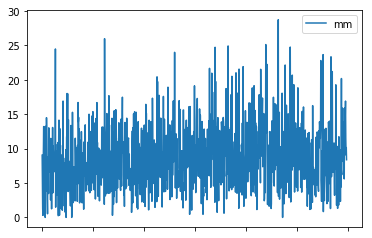

In [29]:
precipitation_df = pd.DataFrame(dateDictionary, index=[0]).transpose()
precipitation_df.fillna(0, inplace=True)
precipitation_df.columns = ["mm"]
precipitation_df.plot()
plt.show()

precipitation_df.to_csv("SanJuan_precipitation_weekly.csv")

In [30]:
sanjuan_cases[:-208]

,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,additional_cases,total_cases
0,1990/1991,1,1990-04-30,0,0,0,0,4,0,4
1,1990/1991,2,1990-05-07,0,0,0,0,5,0,5
2,1990/1991,3,1990-05-14,0,0,0,0,4,0,4
3,1990/1991,4,1990-05-21,0,0,0,0,3,0,3
4,1990/1991,5,1990-05-28,0,0,0,0,6,0,6
5,1990/1991,6,1990-06-04,1,0,0,0,1,0,2
6,1990/1991,7,1990-06-11,0,0,0,0,4,0,4
7,1990/1991,8,1990-06-18,0,0,0,0,5,0,5
8,1990/1991,9,1990-06-25,2,0,0,0,8,0,10
9,1990/1991,10,1990-07-02,0,0,0,1,5,0,6


In [31]:
precipitation_df["mm"][:-208]

1990-04-30     9.052000
1990-05-07     5.408571
1990-05-14     1.287143
1990-05-21     0.297143
1990-05-28     6.961429
1990-06-04    10.171429
1990-06-11    13.212857
1990-06-18     4.131429
1990-06-25     0.552857
1990-07-02    11.784286
1990-07-09     1.731429
1990-07-16    11.764286
1990-07-23     0.000000
1990-07-30    13.245714
1990-08-06     8.718571
1990-08-13     3.855714
1990-08-20     6.008571
1990-08-27    14.500000
1990-09-03    11.564286
1990-09-10     5.875714
1990-09-17     2.594286
1990-09-24     0.530000
1990-10-01     8.738571
1990-10-08     6.170000
1990-10-15     6.910000
1990-10-22     3.474286
1990-10-29    13.024000
1990-11-05    10.295714
1990-11-12     6.562857
1990-11-19     7.787143
                ...    
2008-09-30     8.468571
2008-10-07    16.314286
2008-10-14     7.521429
2008-10-21     6.228571
2008-10-28     5.120000
2008-11-04     6.082857
2008-11-11     9.638571
2008-11-18    11.587143
2008-11-25    15.061429
2008-12-02     8.682857
2008-12-09     7

In [32]:
print(np.correlate(sanjuan_cases["total_cases"], precipitation_df["mm"]))

[383745.620549]
